## Definir o valor da Gorjeta em um restaurante com base na qualidade do serviço e da comida

In [ ]:
# SITE - https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [40]:
# INSTALAR O skfuzzy
!pip install networkx==2.3
!pip install scikit-fuzzy

In [41]:
# IMPORTAR AS BIBLIOTECAS NECESSÁRIAS
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [42]:
# CRIAR AS VARIÁVEIS DO PROBLEMA
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
serviço = ctrl.Antecedent(np.arange(0, 11, 1), 'serviço')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

In [43]:
# CRIAR O MAPEAMENTO ENTRE VALORES NÍTIDOS E DIFUSOS
# USANDO UMA FUNÇAO DE PERTINÊNCIA PADRÃO (TRIÂNGULO)
comida.automf (names = ['péssimo', 'comível', 'deliciosa'])

In [44]:
# CRIAR AS FUNÇÕES DE  PARA SERVIÇO
serviço ['ruim'] = fuzz.trimf (serviço.universe, [0, 0, 5])
serviço ['aceitável'] = fuzz.gaussmf (serviço.universe, 5, 2)
serviço ['excelente'] = fuzz.gaussmf (serviço.universe, 10, 3)

In [45]:
# CRIAR AS FUNÇÕES DE  PARA GORJETA
gorjeta ['baixo'] = fuzz.trimf (gorjeta.universe, [0, 0, 13])
gorjeta ['médio'] = fuzz.trapmf (gorjeta.universe, [0, 13, 15, 25])
gorjeta ['alto'] = fuzz.trimf (gorjeta.universe, [15, 25, 25])

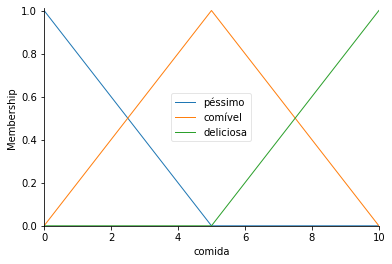

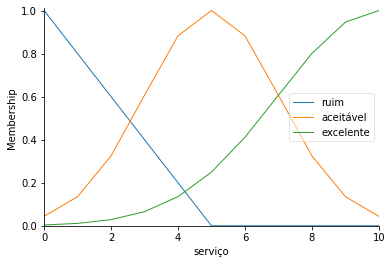

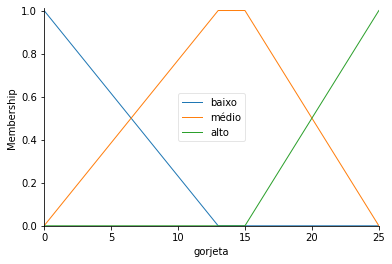

In [46]:
# CRIAR GRÁFICOS
comida.view()
serviço.view()
gorjeta.view()

In [47]:
# CRIAR AS REGRAS DE DECISÃO DIFUSAS
Rule01 = ctrl.Rule (serviço ['excelente'] | comida ['deliciosa'], gorjeta ['alto'])
Rule02 = ctrl.Rule (serviço ['aceitável'], gorjeta ['médio'])
Rule03 = ctrl.Rule (serviço ['ruim'] & comida ['péssimo'], gorjeta ['médio'])

In [50]:
# CRIAR E SIMULAR UM CONTROLADOR NEBULOSO
gorjeta_ctrl = ctrl.ControlSystem ([Rule01, Rule01, Rule03])
gorjeta_simulador = ctrl.ControlSystemSimulation (gorjeta_ctrl)

# ENTRANDO COM ALGUNS VALORES PARA QUALIDADE DA COMIDA E DO SERVIÇO
gorjeta_simulador.input ['comida'] = 4.0
gorjeta_simulador.input ['serviço'] = 9.5

# COMPUTANDO OS RESULTADOS
gorjeta_simulador.compute()
print(gorjeta_simulador.output ['gorjeta'])

21.664297045297925


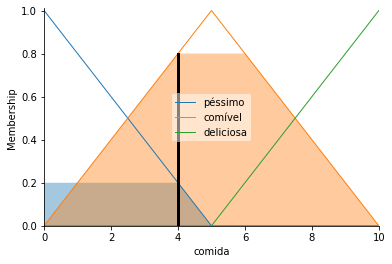

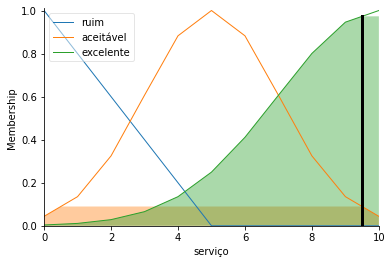

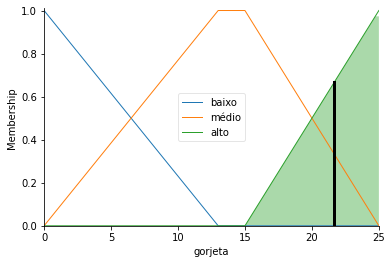

In [52]:
# MOSTRAR RESULTADO EM GRÁFICO
comida.view (sim = gorjeta_simulador)
serviço.view (sim = gorjeta_simulador)
gorjeta.view (sim = gorjeta_simulador)
# OBS: A BARRA NA COR PRETA É CHAMADA DE CRISP